<a href="https://colab.research.google.com/github/riccardo0001/Experiments/blob/main/MNIST%20exercise%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPTICAL CHARACTER RECOGNITION (MNIST DATASET)

In [ ]:
# import the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
# fetch the data into input features X and target y
X = mnist.data
y = mnist.target.astype(int)

In [ ]:
# define function to print the images
import matplotlib.pyplot as plt
def print_image(index):
  example = X.loc[index].values
  example = example.reshape(28,28)
  plt.imshow(example, cmap='GnBu')
  plt.axis('off')

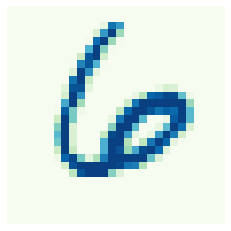

In [ ]:
print_image(6526)

In [ ]:
# divide into train & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print('Train set size:', X_train.shape)
print('Test set size:', X_test.shape)

Train set size: (56000, 784)
Test set size: (14000, 784)


In [ ]:
# try with K neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)
KNC.predict(X_train.loc[43].values.reshape(1,784))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([9])

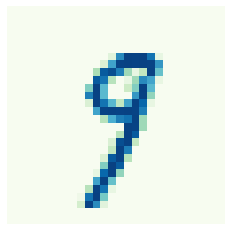

In [ ]:
print_image(43)

In [ ]:
# get evaluation metrics
from sklearn.model_selection import cross_val_score
cross_val_score(KNC, X_train, y_train, cv=4, scoring="accuracy")

array([0.9675    , 0.96957143, 0.97057143, 0.9665    ])

In [ ]:
# it's good but I try better hyperparameters
from sklearn.model_selection import GridSearchCV
KNC_grid_tuned = KNeighborsClassifier()
parameters = {'leaf_size':list(range(1,50)), 'n_neighbors':list(range(1,35)), 'p':[1,2]}
grid_search = GridSearchCV(KNC_grid_tuned, parameters, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2; 1/12] START n_neighbors=4, p=1, weights=uniform........................
[CV 1/2; 1/12] END n_neighbors=4, p=1, weights=uniform;, score=(train=0.970, test=0.956) total time=10.7min
[CV 2/2; 1/12] START n_neighbors=4, p=1, weights=uniform........................


In [ ]:
y_train.value_counts()/len(y_train)

1    0.112089
7    0.103393
3    0.101929
2    0.100179
0    0.099286
9    0.098893
4    0.098732
6    0.097857
8    0.097643
5    0.090000
Name: class, dtype: float64